# Model for content based filtering
This notebook process data to create a ml model.

## Loading data from csv

In [8]:
import pandas as pd
df = pd.read_csv("dataset_movies.csv")
df.set_index("id",inplace=True)
# Compute mean of columns
runtime_mean = int(df["runtime"].mean())
budget_mean = int(df["budget"].mean())
revenue_mean = int(df["revenue"].mean())

# Substitute runtime NaN with average runtime
df["runtime"].replace(0,runtime_mean,inplace=True)
df["budget"].replace(0,budget_mean,inplace=True)
df["revenue"].replace(0,revenue_mean,inplace=True)
df

,budget,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
2,2490265,Ariel,8.165,10/21/1988,6394983,73,6.8,157,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2490265,Varjoja paratiisissa,8.509,10/17/1986,6394983,74,7.2,158,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4000000,Four Rooms,14.441,12/9/1995,4257354,98,5.7,2127,0,0,...,0,0,0,0,0,0,0,0,0,0
6,21000000,Judgment Night,13.336,10/15/1993,12136938,110,6.5,230,1,0,...,0,0,0,0,0,0,0,1,0,0
8,42000,Life in Loops (A Megacities RMX),2.352,1/1/2006,6394983,80,7.5,18,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100819,2490265,Visions of Ecstasy,1.724,1/1/1989,6394983,18,4.7,6,0,0,...,1,1,0,0,0,0,0,0,0,0
100820,2490265,Are You Ready for Love?,1.342,12/9/2006,6394983,85,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100821,2490265,"Run Wild, Run Free",2.833,3/28/1969,6394983,100,6.8,4,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing data to ML Model

### Drop Dates before 1900
We drop movies before 1900.

In [9]:
import re

def find_1800(date):
    """This function find for "yyyy-mm-dd" or "yyyy-dd-mm" format date.\n
    Return a bool series list where true if are occurence."""
    return bool(re.findall(r"[0-9]{4}-[0-9]{2}-[0-9]{2}",date))

print("Rows to drop.")
print(df["release_date"][df["release_date"].apply(find_1800)])

Rows to drop.
id
160      1896-01-25
774      1895-03-22
16463    1888-10-14
16464    1888-10-15
16612    1894-03-14
16613    1892-10-28
16622    1892-10-28
16624    1893-05-08
32406    1889-01-14
32570    1897-12-01
32571    1890-11-21
33229    1891-05-20
33315    1890-11-21
33316    1890-01-01
33317    1890-11-21
33318    1891-04-30
34372    1895-08-28
35975    1898-01-01
49295    1899-01-01
49296    1898-01-01
82120    1895-06-10
88013    1892-10-28
94570    1896-04-01
96186    1898-01-01
96882    1888-01-01
Name: release_date, dtype: object


In [10]:
drop_index = df["release_date"][df["release_date"].apply(find_1800)].index
df.drop(drop_index, inplace=True)

print("-----------------------------------------")
print("Rows in 'yyyy-mm-dd' format after drop")
print(df["release_date"][df["release_date"].apply(find_1800)])

-----------------------------------------
Rows in 'yyyy-mm-dd' format after drop
Series([], Name: release_date, dtype: object)


### Extracting title and release date column
We will use this dataframe to extract name by id.

In [11]:
titles = df[["original_title","release_date"]]
titles

,original_title,release_date
id,,
2,Ariel,10/21/1988
3,Varjoja paratiisissa,10/17/1986
5,Four Rooms,12/9/1995
6,Judgment Night,10/15/1993
8,Life in Loops (A Megacities RMX),1/1/2006
...,...,...
100819,Visions of Ecstasy,1/1/1989
100820,Are You Ready for Love?,12/9/2006
100821,"Run Wild, Run Free",3/28/1969


### Eliminate title column from dataframe

In [12]:
df.drop("original_title",axis=1,inplace=True)
df

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
2,2490265,8.165,10/21/1988,6394983,73,6.8,157,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2490265,8.509,10/17/1986,6394983,74,7.2,158,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4000000,14.441,12/9/1995,4257354,98,5.7,2127,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,21000000,13.336,10/15/1993,12136938,110,6.5,230,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,42000,2.352,1/1/2006,6394983,80,7.5,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100819,2490265,1.724,1/1/1989,6394983,18,4.7,6,0,0,0,...,1,1,0,0,0,0,0,0,0,0
100820,2490265,1.342,12/9/2006,6394983,85,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100821,2490265,2.833,3/28/1969,6394983,100,6.8,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Transform date to ordinal

In [13]:
from datetime import datetime

def date_to_ordinal(date):
    """Transform date in format %Y/%m/%d to ordinal date type."""
    if date != "0":
        return datetime.strptime(date, "%m/%d/%Y").toordinal()
    else:
        return 0

#apply method apply function in all element column(s)
#transform method is similar to apply
df["release_date"] = df["release_date"].apply(date_to_ordinal)
df

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
2,2490265,8.165,726031,6394983,73,6.8,157,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2490265,8.509,725296,6394983,74,7.2,158,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4000000,14.441,728636,4257354,98,5.7,2127,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,21000000,13.336,727851,12136938,110,6.5,230,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,42000,2.352,732312,6394983,80,7.5,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100819,2490265,1.724,726103,6394983,18,4.7,6,0,0,0,...,1,1,0,0,0,0,0,0,0,0
100820,2490265,1.342,732654,6394983,85,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100821,2490265,2.833,718884,6394983,100,6.8,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Replace 0 release date for mean ordinal date

In [14]:
release_date_mean = int(df["release_date"].mean())
df["release_date"].replace(0,release_date_mean,inplace=True)
df

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
2,2490265,8.165,726031,6394983,73,6.8,157,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2490265,8.509,725296,6394983,74,7.2,158,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4000000,14.441,728636,4257354,98,5.7,2127,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,21000000,13.336,727851,12136938,110,6.5,230,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,42000,2.352,732312,6394983,80,7.5,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100819,2490265,1.724,726103,6394983,18,4.7,6,0,0,0,...,1,1,0,0,0,0,0,0,0,0
100820,2490265,1.342,732654,6394983,85,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100821,2490265,2.833,718884,6394983,100,6.8,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Normalize data using StandardScaler

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Create scaler object (x-mu)/sigma
scaler = MinMaxScaler()
# Just normalize first 7 columns
scaler.fit(df.iloc[:, :7])

#Create new pandas dataframe
df_standard = pd.DataFrame(scaler.transform(df.iloc[:,:7]),columns=df.iloc[:,:7].columns)
df_standard["id"] = df.index
df_standard.set_index("id",inplace=True)

# Concat standar dataframe (first 7 columns) with df[:,7:]
df_standard = pd.concat([df_standard,df.iloc[:,7:]],axis=1)
df_standard

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
2,0.006553,0.018780,0.710639,0.002246,0.040022,0.68,0.005038,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.006553,0.019633,0.694536,0.002246,0.040578,0.72,0.005070,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.010526,0.034359,0.767714,0.001495,0.053919,0.57,0.068247,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.055263,0.031616,0.750515,0.004263,0.060589,0.65,0.007380,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0.000111,0.004349,0.848254,0.002246,0.043913,0.75,0.000578,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100819,0.006553,0.002790,0.712217,0.002246,0.009450,0.47,0.000193,0,0,0,...,1,1,0,0,0,0,0,0,0,0
100820,0.006553,0.001842,0.855747,0.002246,0.046693,0.00,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100821,0.006553,0.005543,0.554051,0.002246,0.055031,0.68,0.000128,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Using Metric to fin top 10 Movies

### Looking for id Movie

In [29]:
from jellyfish import levenshtein_distance

# Looking for similarity names movies
movie_name = "Batman: The Dark Knight Returns"

# Calculates distance beetwen movie name and list fo titles
idx = titles["original_title"].apply(
    lambda x: levenshtein_distance(movie_name,x))
idx = idx.sort_values()[:10]    # Sort vector distances and extract first 10
titles.loc[idx.index]           # Show title names

,original_title,release_date
id,,
37620,The Black Knight Returns,2/1/2009
50556,Batbabe: The Dark Nightie,2/24/2009
49026,The Dark Knight Rises,7/16/2012
13851,Batman: Gotham Knight,7/8/2008
17549,UFC 39: The Warriors Return,9/27/2002
53111,Billy The Kid Returns,9/4/1938
72003,The Dark Knight,7/11/2011
155,The Dark Knight,7/14/2008
69735,Batman: Year One,9/27/2011


### Using euclidean distance to find similar movies

In [36]:
from sklearn.metrics.pairwise import euclidean_distances

movie_id = 13851 # Movie id to test
print("Selected movie:",
      titles.loc[movie_id].values[0],
      titles.loc[movie_id].values[1])

n = 10      # Number of similar movies

# Calculate distances (euclidean distance)
distances = euclidean_distances(
    df_standard.loc[movie_id].values.reshape(1, -1),
    df_standard)
distances = pd.DataFrame(distances,columns=df.index)

# Order values by ascending order
recomendations = distances.iloc[0].sort_values()[1:n+1]

# Get names of movies
top = titles.loc[recomendations.index]
top.columns = ["Title","Release Date"] # Rename columns
top

Selected movie: Batman: Gotham Knight 7/8/2008


,Title,Release Date
id,,
14611,Ultimate Avengers 2,8/8/2006
56590,All Star Superman,2/22/2011
30061,Justice League: Crisis on Two Earths,2/23/2010
16873,Battle for Terra,9/6/2007
16364,Robotech: The Shadow Chronicles,8/25/2006
12180,Star Wars: The Clone Wars,8/5/2008
67818,To: A Space Fantasy,5/27/2010
18837,マクロスプラス ＭＯＶＩＥ ＥＤＩＴＩＯＮ,10/6/1995
47556,宇宙戦艦ヤマト 復活篇,12/12/2009


### Extract covers top 10
Function to extract request image object.

In [50]:
def extract_img(movie_id):
    # Api data and movie index example
    api_key = "44f9a7f09387a49408460a6d158e1f44"
    # URL to retrieve movie info
    url = "https://api.themoviedb.org/3/movie/" + \
        str(movie_id) + "?api_key=" + api_key
    # Making a request example
    request_obj = requests.get(url).text
    # Load dictionary with file info from request
    row = json.loads(request_obj)
    # Poster URL
    poster_url = "https://image.tmdb.org/t/p/w500"+str(row.get("poster_path"))
    return requests.get(poster_url)

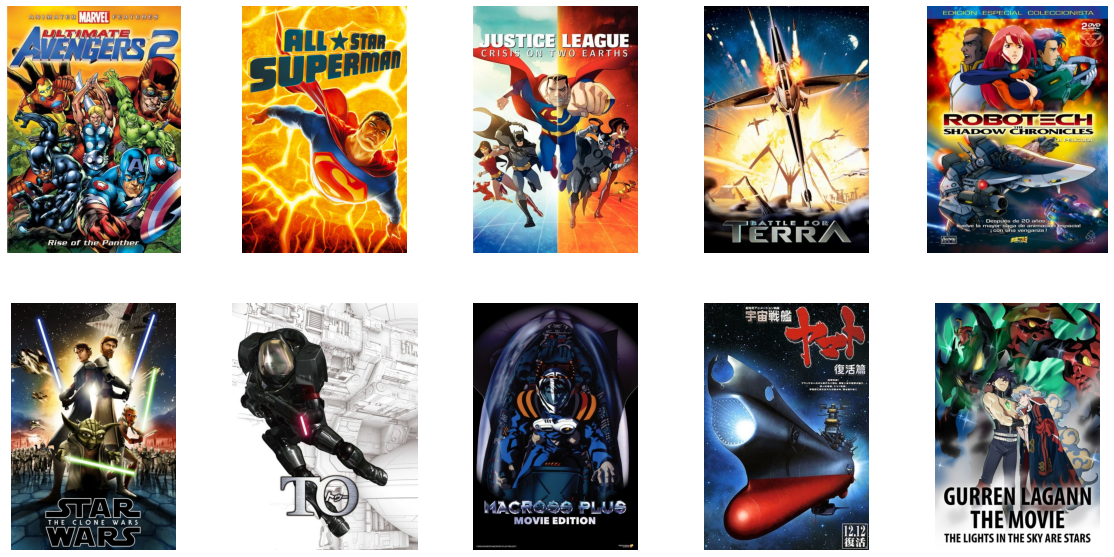

In [52]:
from matplotlib import pyplot as plt
from PIL import Image
from io import BytesIO
import json
import requests

counter = 0
plt.figure(figsize=(20,10))
for movie_idx in top.index:
    poster_img = extract_img(movie_idx)
    if poster_img.status_code == 200:
        imshow = Image.open(BytesIO(poster_img.content))
        plt.subplot(2,5,counter+1)
        plt.axis('off')
        plt.imshow(imshow)
        counter += 1
plt.show()